In [62]:
library('igraph')
library('pracma')
library('Matrix')

### 1. Random walk on Erdos-Renyi networks

a) Create an undirected random network with 900 nodes, and the probability $p$ for drawing and edge between any pair of nodes equal to 0.015.

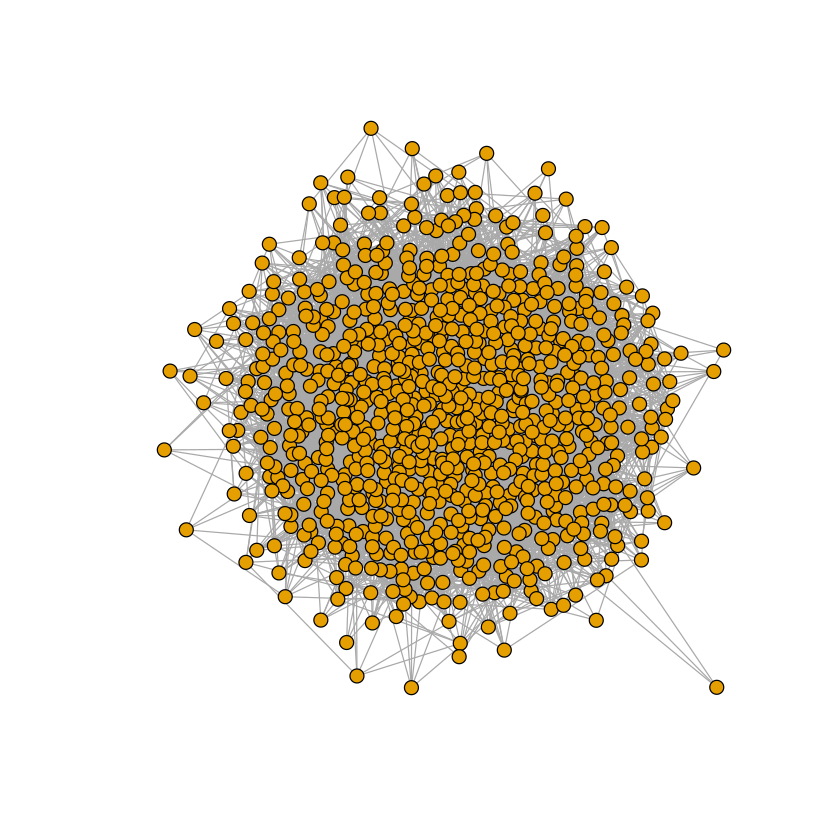

In [47]:
# number of nodes
n <- 900
# Probability of edge creation
p <- 0.015
# Generate the random graph
g <- erdos.renyi.game(n, p, type="gnp", directed=FALSE)
# Plot the graph
plot(g, vertex.size=5, vertex.label=NA)

b) Let a random walker start from a randomly selected node (no teleportation). We use $t$ to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) $<s(t)>$ of the walker from his starting point at step $t$. Also, measure the variance $\sigma^2(t)=<(s(t)-<s(t)>)^2>$ of this distance. Plot $<s(t)$ v.s. $t$ and $\sigma^2(t)$ v.s. $t$. Here, the average $<.>$ is over random choices of the starting nodes.

In [48]:
# create_transition_matrix = function (g){
    
#     # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
#     vs = V(g)
#     n = vcount(g)
#     adj = as_adjacency_matrix(g)
#     adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
#     z = matrix(rowSums(adj, , 1))
    
#     transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
#     return(transition_matrix)
# }

# random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
#     if(is.null(transition_matrix))
#         transition_matrix = create_transition_matrix(g)
        
#     v = start_node
#     for(i in 1:num_steps){
#         # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
#         PMF = transition_matrix[v, ]
#         v = sample(1:vcount(g), 1, prob = PMF)        
#     }
    
#     return(v)
# }


# n <- vcount(g) # Number of nodes

# # Parameters
# num_walks <- 100 # Number of random walks to simulate
# max_steps <- 50 # Maximum number of steps per walk

# # Initialize vectors to share the mean distance and variance at each step 
# mean_distances <- numeric(max_steps)
# variances <- numeric(max_steps)
# # Simulate the random walks
# for (walk in 1:num_walks) {
#     start_node <- sample(1:n,1)
#     last_node <- random_walk(g, max_steps, start_node)
#     distance <- shortest_paths(g, from=start_node, to=last_node)$vpath[[1]] %>% length() - 1
#     mean_distances <- mean_distances + distance
#     variances <- variances + distance^2
# }
# # Calculate the final average distances and variances
# mean_distances <- mean_distances / num_walks
# variances <- (variances / num_walks) - (mean_distances^2)
# print(mean_distances)
# print('next line')
# print(variances)
# # start_node <- sample(1:n,1)
# # print(start_node)
# # last_node <- random_walk(g, max_steps, start_node)
# # print(last_node)
# # distance <- shortest_paths(g, from=start_node, to=last_node)$vpath[[1]] %>% length() - 1
# print(distance)

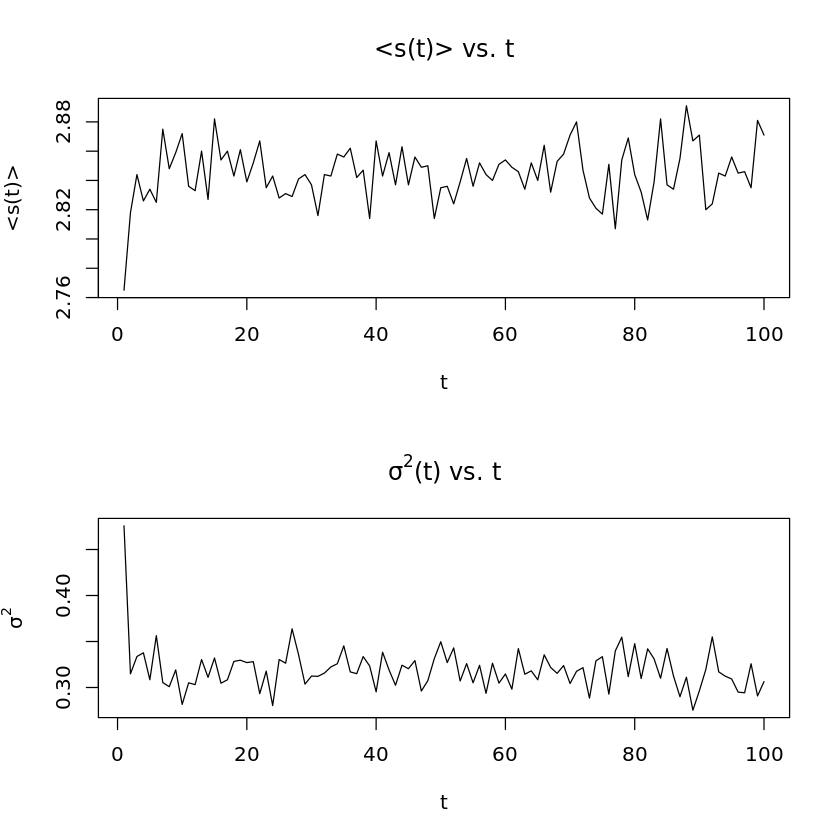

In [49]:
library(igraph)

# Assuming g is your graph
n <- vcount(g)  # Number of nodes

# Parameters
num_walks <- 1000  # Number of random walks to simulate
max_steps <- 100  # Maximum number of steps per walk

# Initialize vectors to store the mean distance and variance at each step
mean_distances <- numeric(max_steps)
variances <- numeric(max_steps)

# Simulate the random walks
for (walk in 1:num_walks) {
  start_node <- sample(1:n, 1)  # Randomly select a starting node
  
  current_node <- start_node
  distances <- numeric(max_steps)  # To store distances for this walk
  
  for (step in 1:max_steps) {
    # Randomly select a neighbor to walk to
    neighbors <- neighbors(g, current_node)
    if (length(neighbors) == 0) {  # Check if the node is isolated
      break
    }
    current_node <- sample(neighbors[[1]], 1)
    
    # Calculate and store the distance from the starting node
    distances[step] <- shortest_paths(g, start_node, current_node)$vpath[[1]] %>% length() - 1
  }
  
  # Update the mean distances and variances
  mean_distances <- mean_distances + distances
  variances <- variances + distances^2
}

# Calculate the final average distances and variances
mean_distances <- mean_distances / num_walks
variances <- (variances / num_walks) - (mean_distances^2)

# Plotting
par(mfrow=c(2,1))  # Set up the plotting area to have 2 rows, 1 column
plot(mean_distances, type='l', main=expression('<s(t)> vs. t'), xlab='t', ylab=expression('<s(t)>'))
plot(variances, type='l', main=expression(sigma^2*'(t) vs. t'), xlab='t', ylab=expression(sigma^2))


c) Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph?

In [50]:
# Function to run multiple random walks and collect end nodes
run_multiple_random_walks <- function(g, num_walks, num_steps) {
    end_nodes <- numeric(num_walks) # Store end nodes
    for(i in 1:num_walks){
        start_node <- sample(1:vcount(g), 1) # Random start node for each walk
        end_nodes[i] <- random_walk(g, num_steps, start_node)
    }
    return(end_nodes)
}

# Degree distribution function
degree_distribution <- function(g, nodes=NULL) {
    if(is.null(nodes)) {
        deg <- degree(g)
    } else {
        deg <- degree(g, v=nodes)
    }
    dist <- table(deg) / length(deg)
    return(dist)
}

# Main execution
num_walks <- 1000 # Number of random walks
num_steps <- 100 # steps per walk
# Run multiple random walks and store the values
end_nodes <- run_multiple_random_walks(g, num_walks, num_steps)
# Degree distribution of end nodes
end_nodes_deg_dist <- degree_distribution(g, end_nodes)
# Degree distribution of entire graph
graph_deg_dist <- degree_distribution(g)
print("Degree distribution of the nodes reached at the end of the random walk is: \n")
print(end_nodes_deg_dist)
print("Degree distribution of graph is: ")
print(graph_deg_dist)

[1] "Degree distribution of the nodes reached at the end of the random walk is: \n"
deg
    4     5     6     7     8     9    10    11    12    13    14    15    16 
0.001 0.001 0.008 0.007 0.015 0.033 0.054 0.069 0.076 0.126 0.087 0.091 0.129 
   17    18    19    20    21    22    23    24    25    26    27    28 
0.070 0.064 0.055 0.035 0.021 0.023 0.004 0.007 0.010 0.001 0.008 0.005 
[1] "Degree distribution of graph is: "
deg
          3           4           5           6           7           8 
0.001111111 0.004444444 0.004444444 0.013333333 0.020000000 0.031111111 
          9          10          11          12          13          14 
0.047777778 0.072222222 0.084444444 0.090000000 0.123333333 0.088888889 
         15          16          17          18          19          20 
0.095555556 0.090000000 0.063333333 0.058888889 0.034444444 0.024444444 
         21          22          23          24          25          26 
0.017777778 0.013333333 0.004444444 0.003333333 0.006

d) Repeat 1(b) for undirected random networks with 900 nodes. Compare the results and explain qualitatively. Does the diameter of the netwrok play a role?

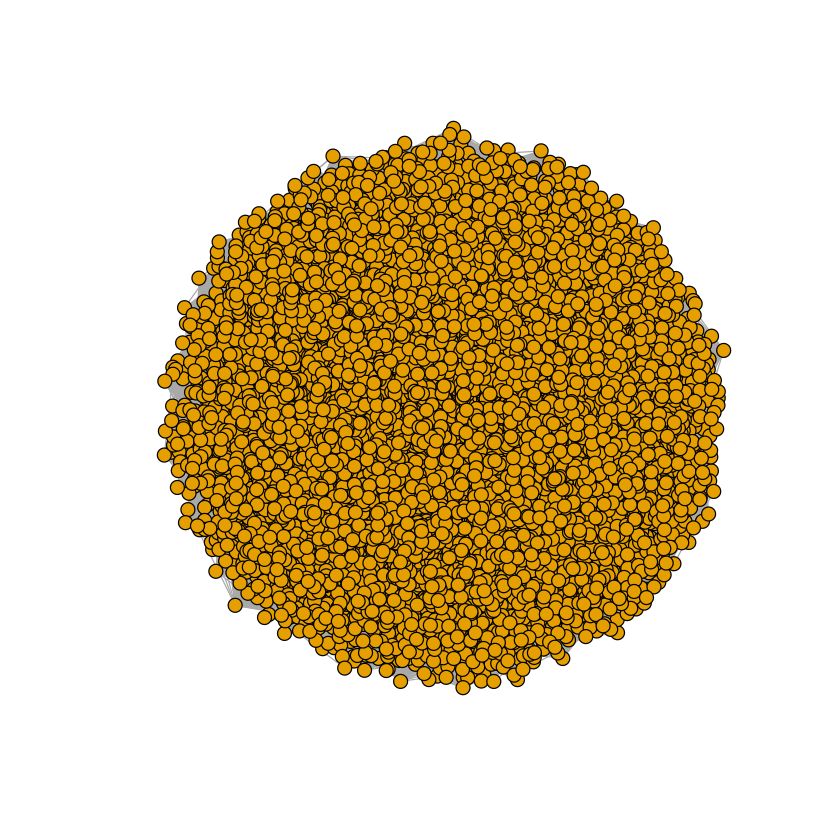

In [51]:
# number of nodes
n <- 9000
# Probability of edge creation
p <- 0.015
# Generate the random graph
g <- erdos.renyi.game(n, p, type="gnp", directed=FALSE)
# Plot the graph
plot(g, vertex.size=5, vertex.label=NA)

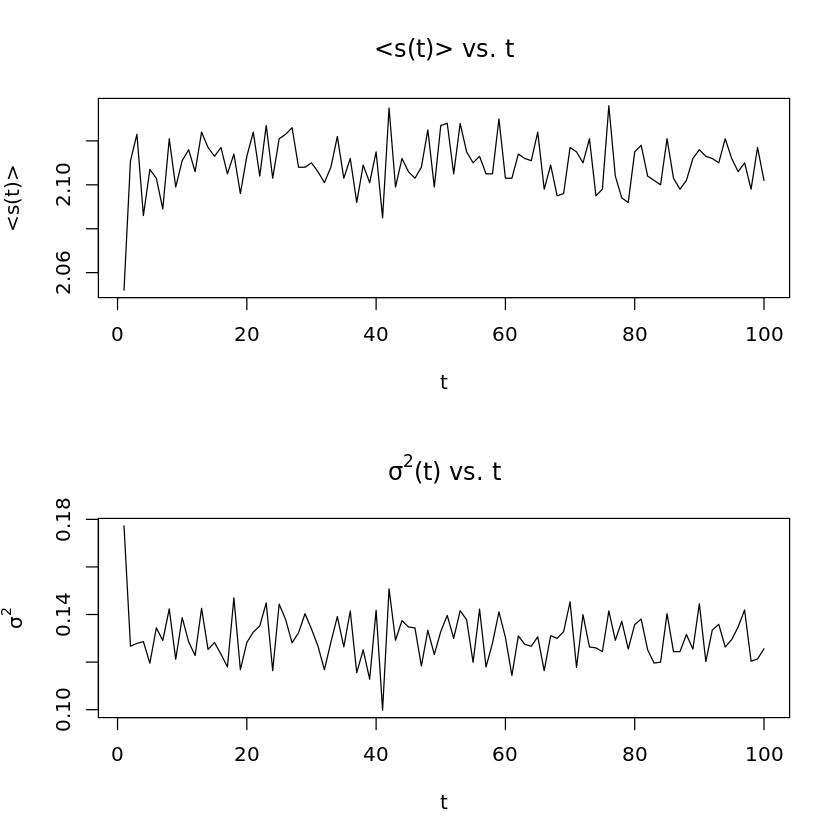

In [54]:
# Assuming g is your graph
n <- vcount(g)  # Number of nodes

# Parameters
num_walks <- 1000  # Number of random walks to simulate
max_steps <- 100  # Maximum number of steps per walk

# Initialize vectors to store the mean distance and variance at each step
mean_distances <- numeric(max_steps)
variances <- numeric(max_steps)

# Simulate the random walks
for (walk in 1:num_walks) {
  start_node <- sample(1:n, 1)  # Randomly select a starting node
  
  current_node <- start_node
  distances <- numeric(max_steps)  # To store distances for this walk
  
  for (step in 1:max_steps) {
    # Randomly select a neighbor to walk to
    neighbors <- neighbors(g, current_node)
    if (length(neighbors) == 0) {  # Check if the node is isolated
      break
    }
    current_node <- sample(neighbors[[1]], 1)
    
    # Calculate and store the distance from the starting node
    distances[step] <- shortest_paths(g, start_node, current_node)$vpath[[1]] %>% length() - 1
  }
  
  # Update the mean distances and variances
  mean_distances <- mean_distances + distances
  variances <- variances + distances^2
}

# Calculate the final average distances and variances
mean_distances <- mean_distances / num_walks
variances <- (variances / num_walks) - (mean_distances^2)

# Plotting
par(mfrow=c(2,1))  # Set up the plotting area to have 2 rows, 1 column
plot(mean_distances, type='l', main=expression('<s(t)> vs. t'), xlab='t', ylab=expression('<s(t)>'))
plot(variances, type='l', main=expression(sigma^2*'(t) vs. t'), xlab='t', ylab=expression(sigma^2))


### Random walk on networks with fat-tailed degree distribution

a) Generate an undirected preferential attachment networks with 900 nodes, where each new node attaches to $m=1$ old nodes.

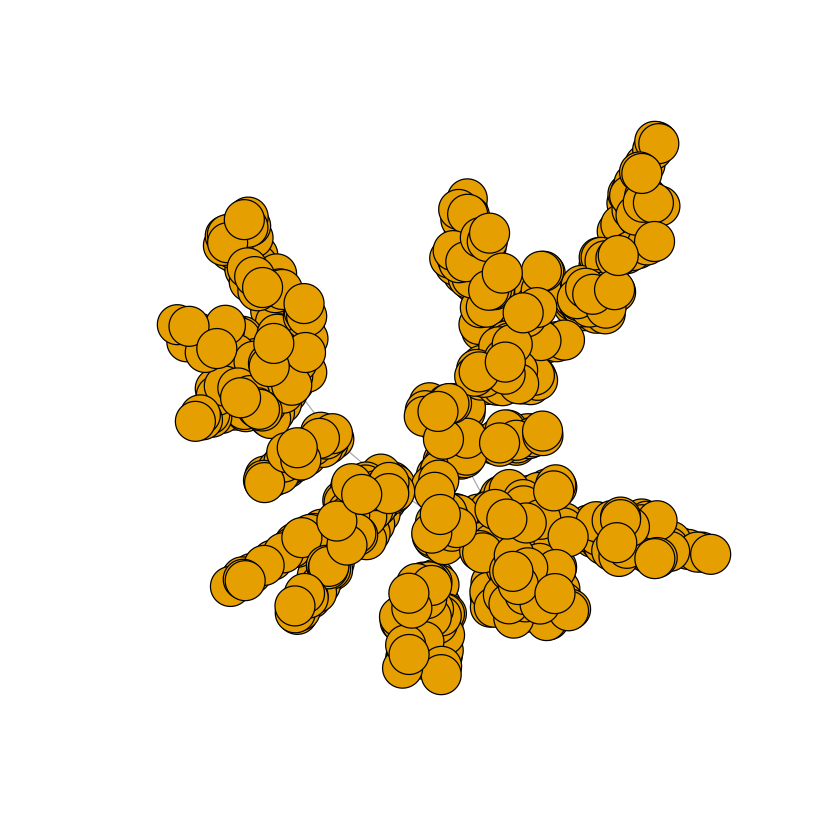

In [55]:
n <- 900
m <- 1

g <- barabasi.game(n, m, directed=FALSE)

plot(g, vertex_size=5, vertex.label=NA)

b) Let a random walker start from a randomly selected node. Measure and plot $<s(t)>$ v.s. $t$ and $\sigma^2(t)$ v.s. $t$.

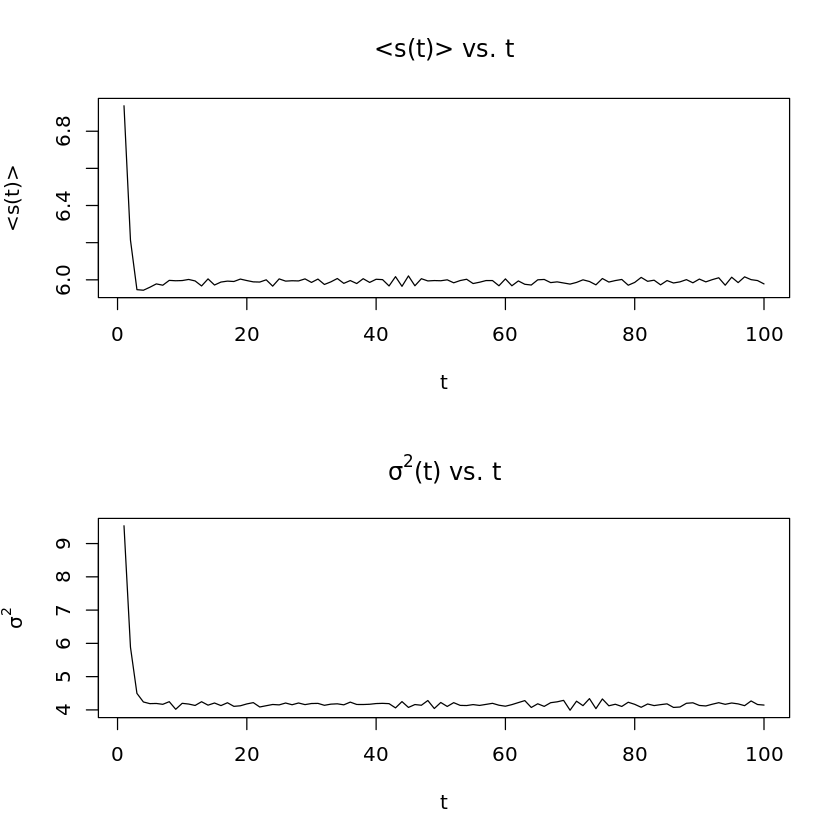

In [56]:
# Assuming g is your graph
n <- vcount(g)  # Number of nodes

# Parameters
num_walks <- 1000  # Number of random walks to simulate
max_steps <- 100  # Maximum number of steps per walk

# Initialize vectors to store the mean distance and variance at each step
mean_distances <- numeric(max_steps)
variances <- numeric(max_steps)

# Simulate the random walks
for (walk in 1:num_walks) {
  start_node <- sample(1:n, 1)  # Randomly select a starting node
  
  current_node <- start_node
  distances <- numeric(max_steps)  # To store distances for this walk
  
  for (step in 1:max_steps) {
    # Randomly select a neighbor to walk to
    neighbors <- neighbors(g, current_node)
    if (length(neighbors) == 0) {  # Check if the node is isolated
      break
    }
    current_node <- sample(neighbors[[1]], 1)
    
    # Calculate and store the distance from the starting node
    distances[step] <- shortest_paths(g, start_node, current_node)$vpath[[1]] %>% length() - 1
  }
  
  # Update the mean distances and variances
  mean_distances <- mean_distances + distances
  variances <- variances + distances^2
}

# Calculate the final average distances and variances
mean_distances <- mean_distances / num_walks
variances <- (variances / num_walks) - (mean_distances^2)

# Plotting
par(mfrow=c(2,1))  # Set up the plotting area to have 2 rows, 1 column
plot(mean_distances, type='l', main=expression('<s(t)> vs. t'), xlab='t', ylab=expression('<s(t)>'))
plot(variances, type='l', main=expression(sigma^2*'(t) vs. t'), xlab='t', ylab=expression(sigma^2))

c) Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph?

In [57]:
# Function to run multiple random walks and collect end nodes
run_multiple_random_walks <- function(g, num_walks, num_steps) {
    end_nodes <- numeric(num_walks) # Store end nodes
    for(i in 1:num_walks){
        start_node <- sample(1:vcount(g), 1) # Random start node for each walk
        end_nodes[i] <- random_walk(g, num_steps, start_node)
    }
    return(end_nodes)
}

# Degree distribution function
degree_distribution <- function(g, nodes=NULL) {
    if(is.null(nodes)) {
        deg <- degree(g)
    } else {
        deg <- degree(g, v=nodes)
    }
    dist <- table(deg) / length(deg)
    return(dist)
}

# Main execution
num_walks <- 1000 # Number of random walks
num_steps <- 100 # steps per walk
# Run multiple random walks and store the values
end_nodes <- run_multiple_random_walks(g, num_walks, num_steps)
# Degree distribution of end nodes
end_nodes_deg_dist <- degree_distribution(g, end_nodes)
# Degree distribution of entire graph
graph_deg_dist <- degree_distribution(g)
print("Degree distribution of the nodes reached at the end of the random walk is: \n")
print(end_nodes_deg_dist)
print("Degree distribution of graph is: ")
print(graph_deg_dist)

[1] "Degree distribution of the nodes reached at the end of the random walk is: \n"
deg
    1     2     3     4     5     6     7     8     9    10    11    14    15 
0.314 0.208 0.121 0.094 0.056 0.021 0.010 0.024 0.041 0.008 0.009 0.009 0.019 
   16    18    21    22    23 
0.015 0.014 0.013 0.016 0.008 
[1] "Degree distribution of graph is: "
deg
          1           2           3           4           5           6 
0.598888889 0.204444444 0.078888889 0.047777778 0.028888889 0.008888889 
          7           8           9          10          11          14 
0.004444444 0.007777778 0.007777778 0.001111111 0.001111111 0.001111111 
         15          16          18          21          22          23 
0.002222222 0.002222222 0.001111111 0.001111111 0.001111111 0.001111111 


d) Repeat 2(b) for preferential attachment networks with 90 and 900 nodes, and $m=1$. Comapre the results and explaint qualitatively. Does the diameter of the netwrok play a role?

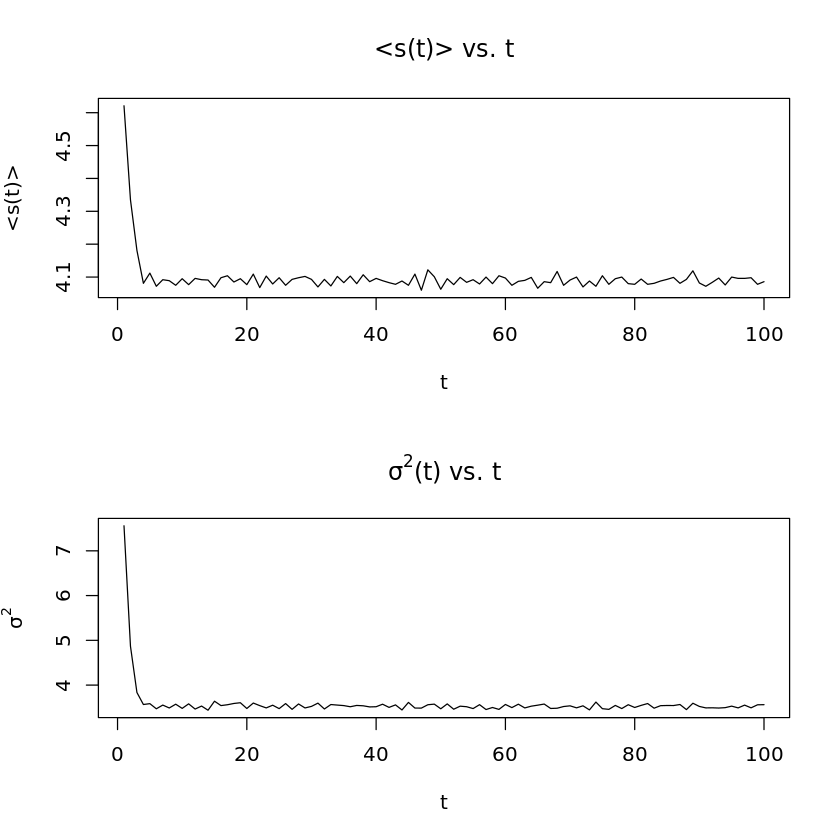

In [58]:
n <- 90
m <- 1

g <- barabasi.game(n, m, directed=FALSE)

# Assuming g is your graph
n <- vcount(g)  # Number of nodes

# Parameters
num_walks <- 1000  # Number of random walks to simulate
max_steps <- 100  # Maximum number of steps per walk

# Initialize vectors to store the mean distance and variance at each step
mean_distances <- numeric(max_steps)
variances <- numeric(max_steps)

# Simulate the random walks
for (walk in 1:num_walks) {
  start_node <- sample(1:n, 1)  # Randomly select a starting node
  
  current_node <- start_node
  distances <- numeric(max_steps)  # To store distances for this walk
  
  for (step in 1:max_steps) {
    # Randomly select a neighbor to walk to
    neighbors <- neighbors(g, current_node)
    if (length(neighbors) == 0) {  # Check if the node is isolated
      break
    }
    current_node <- sample(neighbors[[1]], 1)
    
    # Calculate and store the distance from the starting node
    distances[step] <- shortest_paths(g, start_node, current_node)$vpath[[1]] %>% length() - 1
  }
  
  # Update the mean distances and variances
  mean_distances <- mean_distances + distances
  variances <- variances + distances^2
}

# Calculate the final average distances and variances
mean_distances <- mean_distances / num_walks
variances <- (variances / num_walks) - (mean_distances^2)

# Plotting
par(mfrow=c(2,1))  # Set up the plotting area to have 2 rows, 1 column
plot(mean_distances, type='l', main=expression('<s(t)> vs. t'), xlab='t', ylab=expression('<s(t)>'))
plot(variances, type='l', main=expression(sigma^2*'(t) vs. t'), xlab='t', ylab=expression(sigma^2))

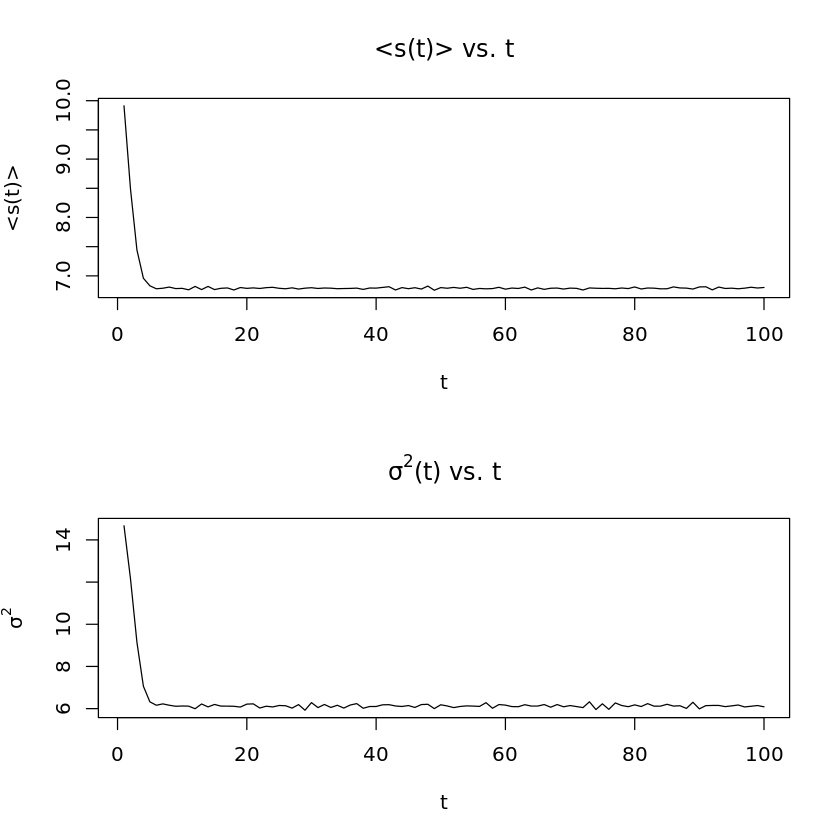

In [59]:
n <- 9000
m <- 1

g <- barabasi.game(n, m, directed=FALSE)

# Assuming g is your graph
n <- vcount(g)  # Number of nodes

# Parameters
num_walks <- 1000  # Number of random walks to simulate
max_steps <- 100  # Maximum number of steps per walk

# Initialize vectors to store the mean distance and variance at each step
mean_distances <- numeric(max_steps)
variances <- numeric(max_steps)

# Simulate the random walks
for (walk in 1:num_walks) {
  start_node <- sample(1:n, 1)  # Randomly select a starting node
  
  current_node <- start_node
  distances <- numeric(max_steps)  # To store distances for this walk
  
  for (step in 1:max_steps) {
    # Randomly select a neighbor to walk to
    neighbors <- neighbors(g, current_node)
    if (length(neighbors) == 0) {  # Check if the node is isolated
      break
    }
    current_node <- sample(neighbors[[1]], 1)
    
    # Calculate and store the distance from the starting node
    distances[step] <- shortest_paths(g, start_node, current_node)$vpath[[1]] %>% length() - 1
  }
  
  # Update the mean distances and variances
  mean_distances <- mean_distances + distances
  variances <- variances + distances^2
}

# Calculate the final average distances and variances
mean_distances <- mean_distances / num_walks
variances <- (variances / num_walks) - (mean_distances^2)

# Plotting
par(mfrow=c(2,1))  # Set up the plotting area to have 2 rows, 1 column
plot(mean_distances, type='l', main=expression('<s(t)> vs. t'), xlab='t', ylab=expression('<s(t)>'))
plot(variances, type='l', main=expression(sigma^2*'(t) vs. t'), xlab='t', ylab=expression(sigma^2))

### Page Rank
The PageRank Algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global "importance" scores that can be used to influence the rankgin of search results. Here, we use random walk to simulate PageRank.

a) We are going to create a directed random network with 900 nodes, using the preferential attachment model. Note that in a directed preferntial attachment network, the out-degree of every node is $m$, while the in-degrees follow a power law distribution. One problem of performing random walk in such network is that, the very first node will have no outbounding edges, and be a "black hole" which a random walker can never "escape" from. To address that, let's generate another 900-node ranodm netwrok with preferntial attachment model, and merge the two networks by adding the edges of the second graph to the first graph with a shuffling of indices of the nodes. Create such a network using $m=4$. Measure the probability that the walker visits each node. Is this probability related to the degree of nodes?

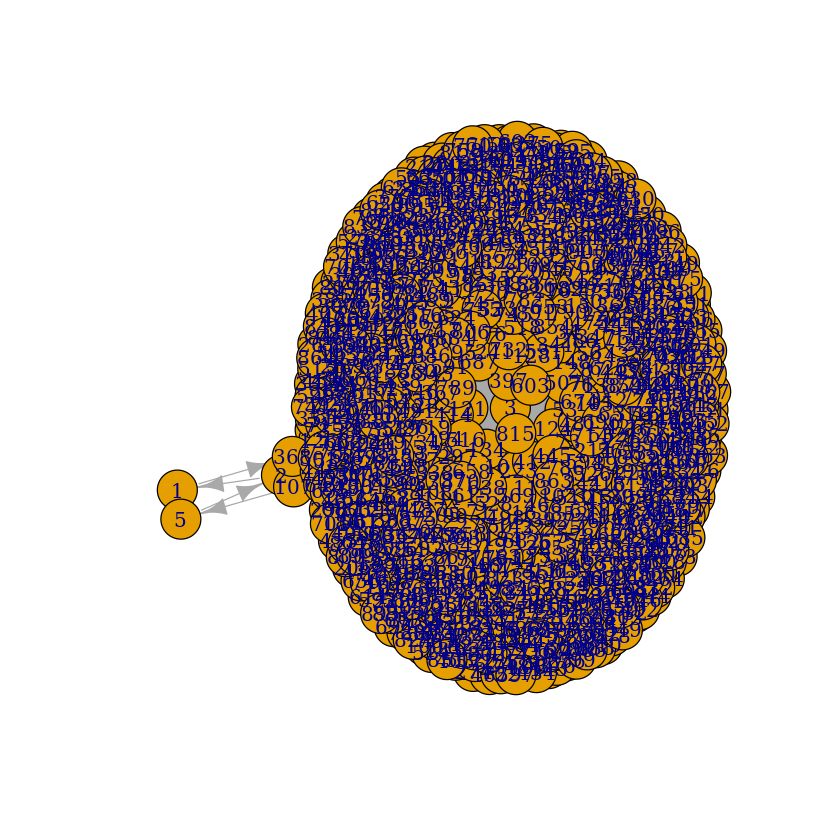

In [121]:
set.seed(42)

# Generate the first directed preferential attachment network
n <- 900
m <- 4
g1 <- barabasi.game(n, m, directed = TRUE)

# Generate the second network
g2 <- barabasi.game(n, m, directed = TRUE)

# Get the edge list of the second graph and shuffle node indices
edge_list <- as_edgelist(g2)
# Shuffled vertices
shuffled_vertices <- sample(V(g2))
# Create a mapping from old to new IDS
mapping <- match(shuffled_vertices, V(g2))
# Remap the edges
remapped_edges <- t(apply(edge_list, 1, function(x) mapping[as.numeric(x)]))
# Add shuffled edges from the second graph to the first graph
g_merged <- add_edges(g1, remapped_edges)
plot(g_merged)

                          

In [126]:
# Initialize visit counts
visit_counts <- numeric(length = vcount(g_merged))
total_steps <- 10000 # Number of steps in the random walk

# Perform the random awlk
current_node <- sample(vcount(g_merged), 1) # Start from a random node
for (i in 1:total_steps) {
    visit_counts[current_node] <- visit_counts[current_node] + 1
}


[1] 1

     [,1] [,2]
[1,]    2    1
[2,]    3    1
[3,]    4    1
+ 4/4 vertices, from 2626494:
[1] 4 1 2 3


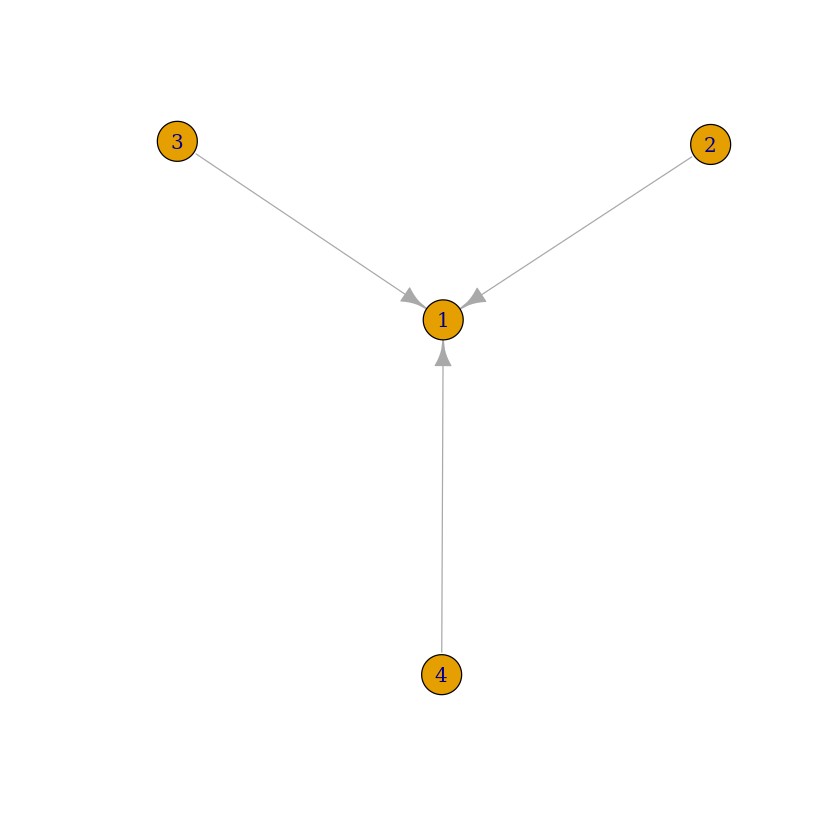

     [,1] [,2]
[1,]    1    4
[2,]    2    4
[3,]    3    4


1,4
2,4
3,4


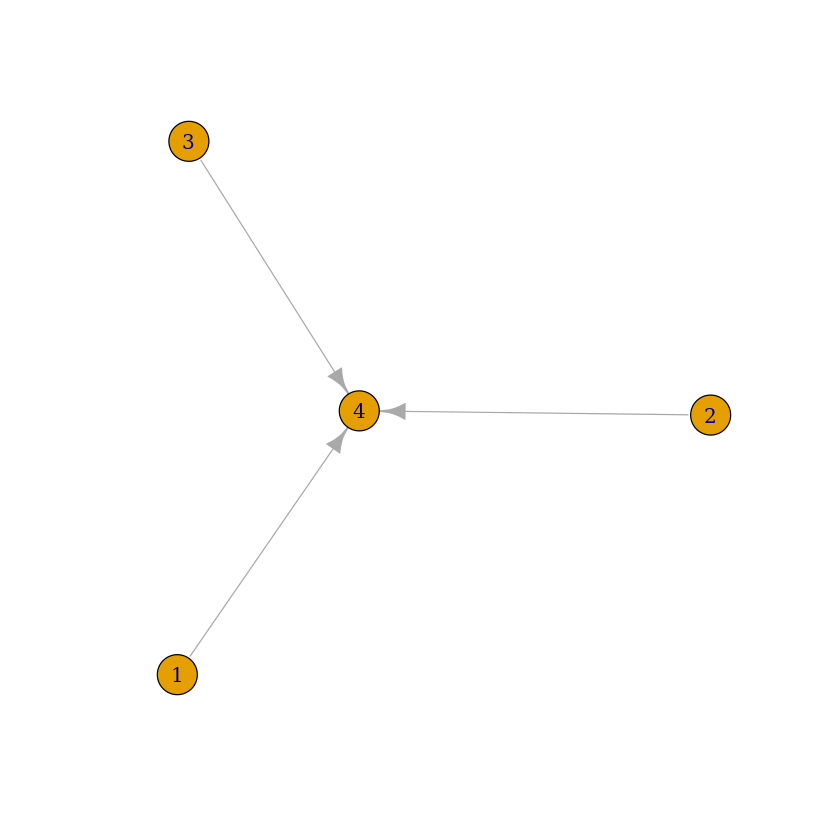

In [120]:
set.seed(3)
n <- 4
m <- 3
g <- barabasi.game(n, m, directed = TRUE)
plot(g)
edge_list <- as_edgelist(g)
print(edge_list)
# shuffled vertices
shuffled_vertices <- sample(V(g))
print(shuffled_vertices)
# Create a mapping from old to new IDS
mapping <- match(shuffled_vertices, V(g))
# Remap the edges
remapped_edges <- t(apply(edge_list, 1, function(x) mapping[as.numeric(x)]))
# Create a new graph from the remapped edges
g_new <- graph_from_edgelist(remapped_edges, directed=TRUE) 
plot(g_new)
print(remapped_edges)
as_edgelist(g_new)

b) In all previous questions, we didn't have any teleportation. Now, we use a teleportation probability of $\alpha=0.2$ (teleport out of a node with prob=0.2 instead of oging to its neighbor). By performing random walks on the network created in 3(a), measure the probability that the walkser visit each node. How is this probability related to the degree of the ndoe and $\alpha$.

### Personalized PageRank
While the use of PageRank ahs proven very effective, the web's rapid growth imn size and diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user should be able to define their own notion of importance for each individual query.

a) Suppose you avhe your own notion of importance. Your interest in a node is proportional to the node's PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simuiatle this personalized PageRank. Here the teleportation prbability to each node is proportinoal to its PageRank (as oppsed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to $\frac{1}{N}$). Again, let the teleportation probability be euqal to $\alpha=0.2$. Compare the results with 3(a).

b) Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilitives 1/2, 1/2). How are the PageRank values affected?

c) More or less, 4(b) is what happens in the real world, in that a user browsing the web only teleports to a set of trusted web pages. However, this is againts the assumption of normal PageRank, where we assume that people's interest in all nodes are the same. Can you take into account the effect of this self-reinforcement and adjust the PageRank equation?